### **Aprendizaje Automatico Actividad 3**

### Alumno: Maria Araceli Díaz Cumplido

## Extensión de la campaña "Seguro Vivienda" de compañía financiera


Tras el éxito obtenido con la campaña "Seguro Vivienda", la compañía ha ecidido aplicar de nuevo el Aprendizaje Automático para comprender mejor los hábitos y 
necesidades de sus clientes.

El objetivo de este nuevo estudio es agrupar a los clientes en distintos  clusters" para que el equipo comercial intente determinar posteriormente qué ipo de productos se adaptan mejor a cada uno de los clusters obtenidos.

Se desconoce el número de clusters óptimo, por lo que el experto en Aprendizaje Automático tendrá que explorar un rango de valores razonable y respaldar sus conclusiones con métricas y gráficas apropiadas.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
datos_path ='/content/drive/MyDrive/Máster Big Data/Colab/Aprendizaje_Automatico/Data' 

Utilizamos las transformaciones de variables de la Actividad 1, en este caso voy a usar la Principal Component Analysis (PCA) y la Independent Component Analysis (ICA )

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA, FastICA
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score


In [10]:
%matplotlib inline

clientes_file = "Clientes_train.csv"
zonas_file = "Zonas.csv"

clientes = pd.read_csv(os.path.join(datos_path, clientes_file), sep='\t')
zonas = pd.read_csv(os.path.join(datos_path, zonas_file), sep='\t')

datos = pd.merge(clientes, zonas, on="ID_Zona", how="inner")

targets = datos["Seguro_Vivienda"]
variables = datos.drop(["Seguro_Vivienda"], axis=1, inplace=False)

variables_numericas = variables._get_numeric_data()



## Transformación de variables

### PCA

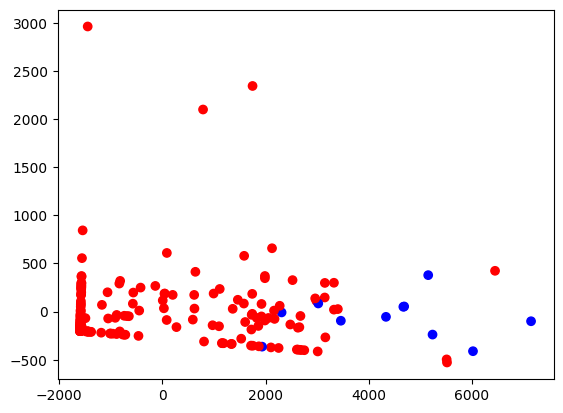

In [11]:
pca = PCA(n_components=10)
pca.fit(variables_numericas)
transformacion_pca = pca.transform(variables_numericas)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion_pca[1:200, 0], transformacion_pca[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()



### ICA

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


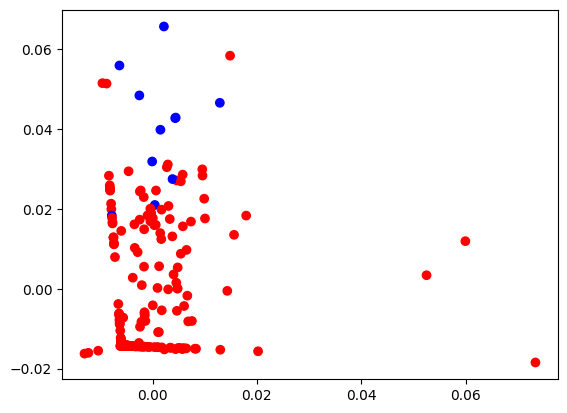

In [12]:
ica = FastICA(n_components=3)
ica.fit(variables_numericas)
transformacion_ica = ica.transform(variables_numericas)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion_ica[1:200, 0], transformacion_ica[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()


## Clustering

### K-Means

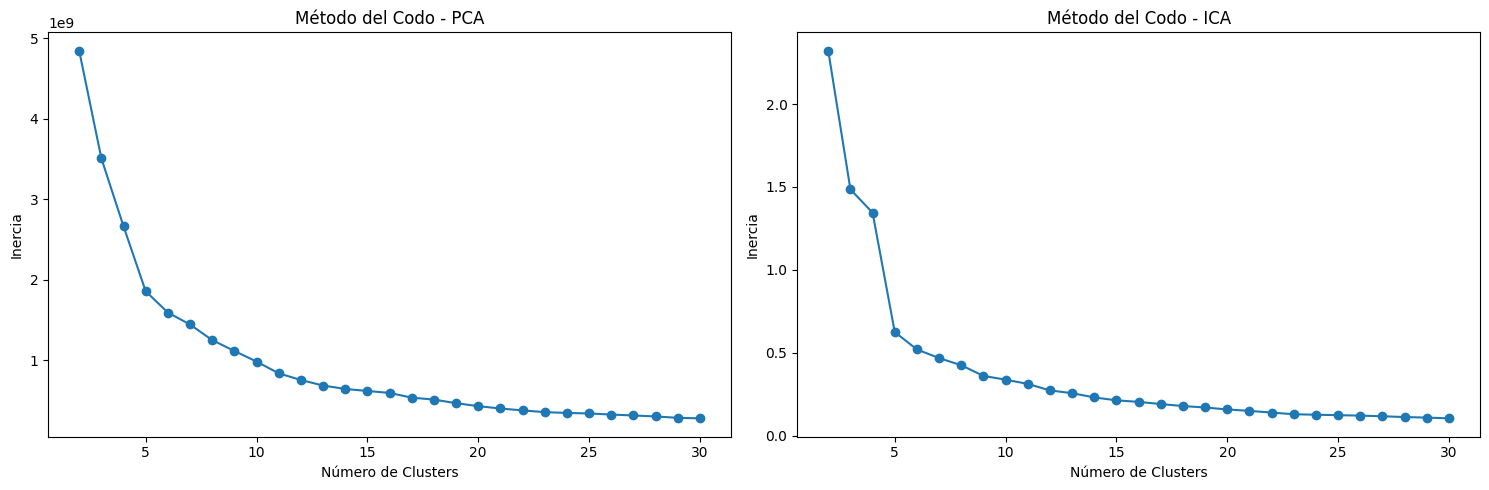

In [15]:

# Clustering con KMeans
clustering_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

# Número de gráficos a mostrar
num_plots = len(clustering_data)

# Configuración del diseño de los subgráficos
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

for i, (name, data) in enumerate(clustering_data.items()):
    ax = axes[i] if num_plots > 1 else axes  # Acceder al subgráfico correspondiente

    # Determinar el número óptimo de clusters utilizando el método del codo
    inertia = []
    num_clusters_range = range(2, 31)  # Rango de valores para el número de clusters

    for k in num_clusters_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data['data'])
        inertia.append(kmeans.inertia_)

    # Graficar la curva de la suma de las distancias cuadradas dentro de los clusters
    ax.plot(num_clusters_range, inertia, marker='o')
    ax.set_xlabel('Número de Clusters')
    ax.set_ylabel('Inercia')
    ax.set_title(f'Método del Codo - {name}')

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Usando el meetodo del codo establezco que el K optimal es 6 para el PCA y 5 para el ICA. Lo grafico para que sea mas claro de la siguiente forma:

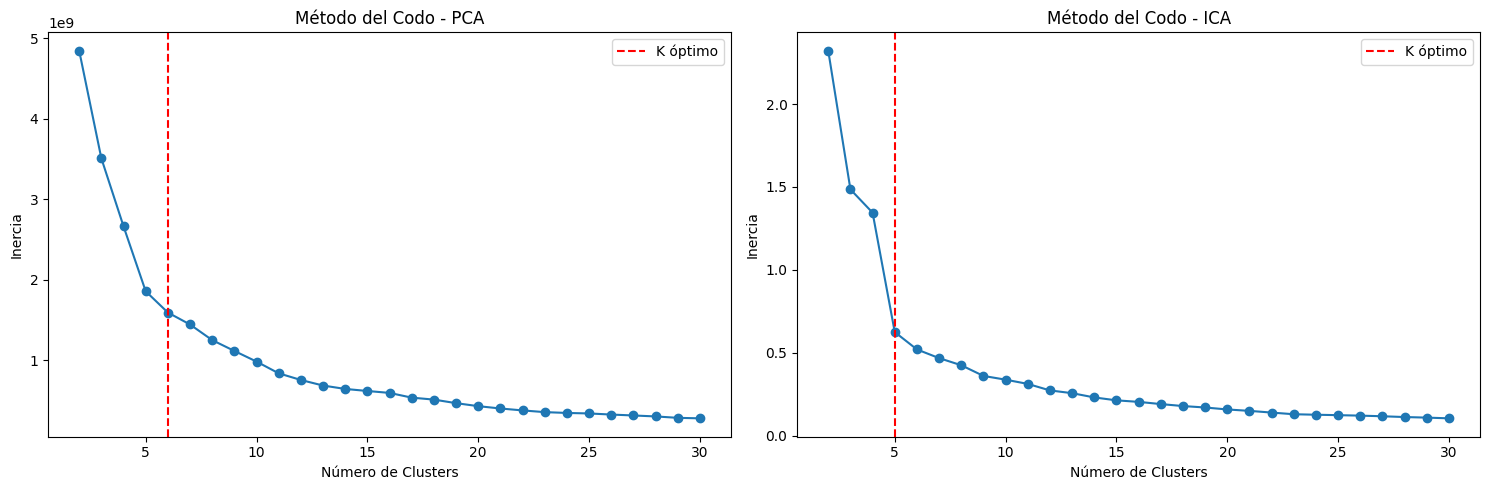

In [18]:
# Clustering con KMeans
clustering_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

# Número de gráficos a mostrar
num_plots = len(clustering_data)

# Configuración del diseño de los subgráficos
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

# Número óptimo de clusters para PCA
k_optimal_kmeans_pca = 6

# Número óptimo de clusters para ICA
k_optimal_kmeans_ica = 5

for i, (name, data) in enumerate(clustering_data.items()):
    ax = axes[i] if num_plots > 1 else axes  # Acceder al subgráfico correspondiente

    # Determinar el número óptimo de clusters utilizando el método del codo
    inertia = []
    num_clusters_range = range(2, 31)  # Rango de valores para el número de clusters

    for k in num_clusters_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data['data'])
        inertia.append(kmeans.inertia_)

    # Graficar la curva de la suma de las distancias cuadradas dentro de los clusters
    ax.plot(num_clusters_range, inertia, marker='o')
    ax.axvline(x=k_optimal_kmeans_pca if name == 'PCA' else k_optimal_kmeans_ica, color='red', linestyle='--', label='K óptimo')
    ax.set_xlabel('Número de Clusters')
    ax.set_ylabel('Inercia')
    ax.set_title(f'Método del Codo - {name}')
    ax.legend()

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


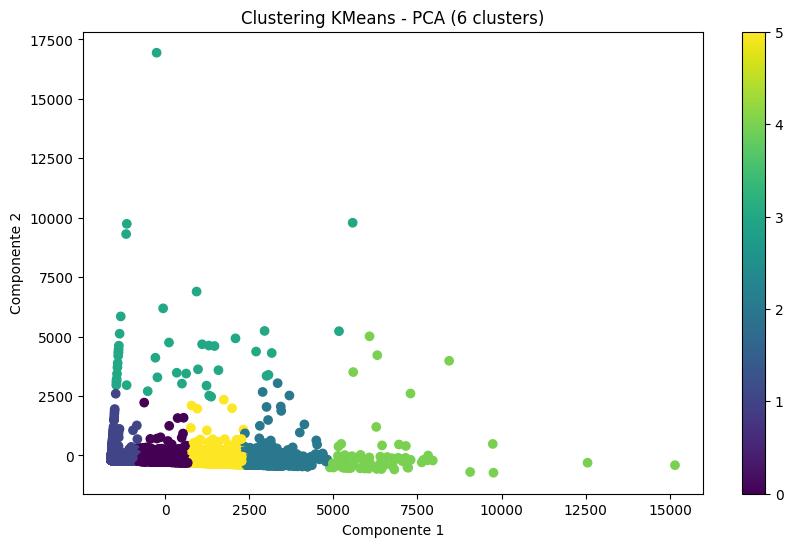

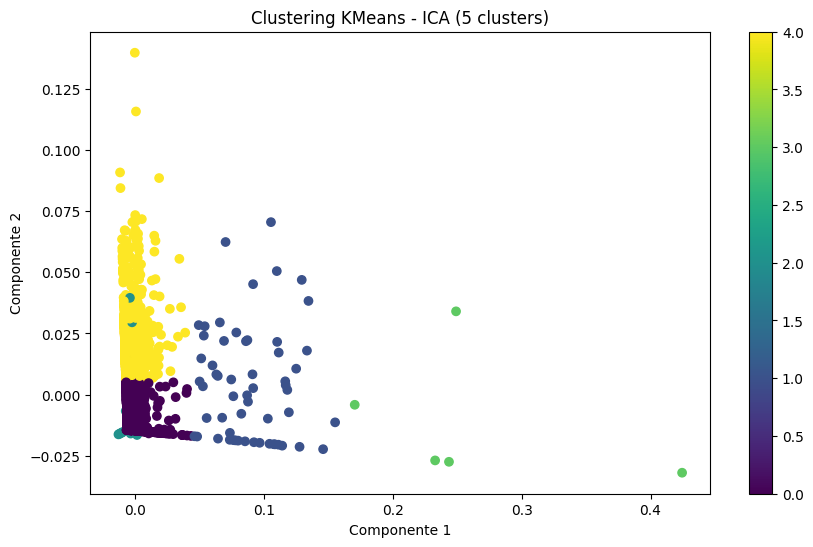

In [20]:
for name, data in clustering_data.items():
    # Realizar el clustering con KMeans
    kmeans = KMeans(n_clusters=k_optimal_kmeans_pca if name == 'PCA' else k_optimal_kmeans_ica, random_state=42, n_init='auto')
    kmeans.fit(data['data'])
    cluster_labels = kmeans.labels_

    # Scatter plot de los datos transformados
    plt.figure(figsize=(10, 6))
    plt.scatter(data['data'][:, 0], data['data'][:, 1], c=cluster_labels, cmap='viridis')
    plt.colorbar()
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title(f'Clustering KMeans - {name} ({k_optimal_kmeans_pca if name == "PCA" else k_optimal_kmeans_ica} clusters)')
    plt.show()


## Gaussian Mixture

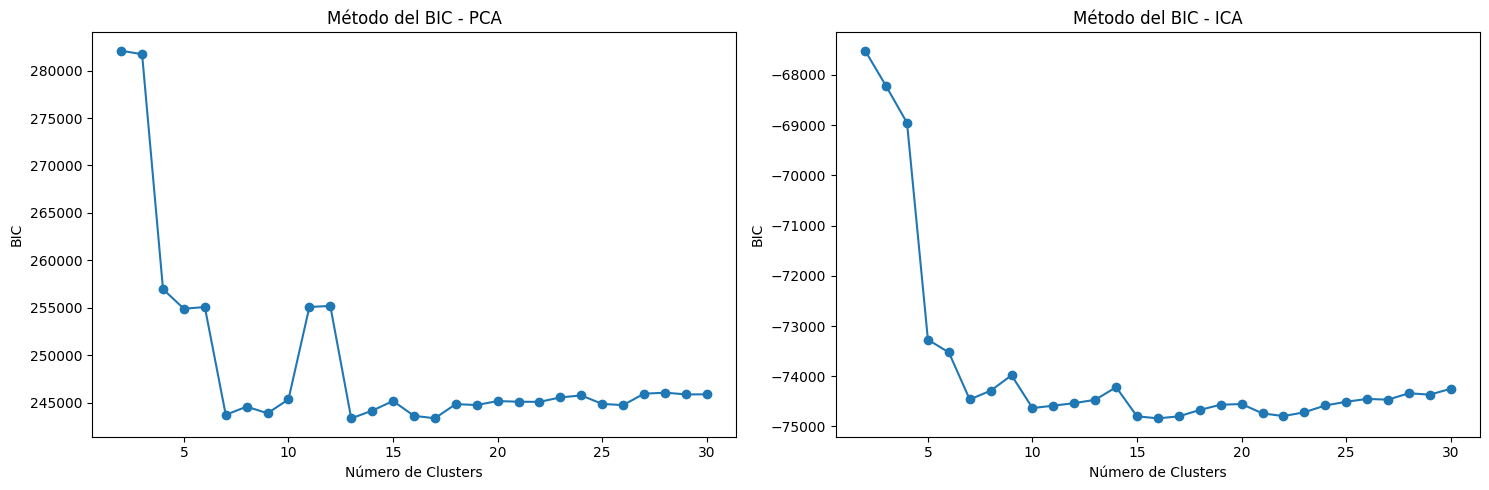

In [21]:
from sklearn.mixture import GaussianMixture

# Clustering con Gaussian Mixture
clustering_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

# Número de gráficos a mostrar
num_plots = len(clustering_data)

# Configuración del diseño de los subgráficos
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

for i, (name, data) in enumerate(clustering_data.items()):
    ax = axes[i] if num_plots > 1 else axes  # Acceder al subgráfico correspondiente

    # Determinar el número óptimo de clusters utilizando el método del codo
    bic = []
    num_clusters_range = range(2, 31)  # Rango de valores para el número de clusters

    for k in num_clusters_range:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data['data'])
        bic.append(gmm.bic(data['data']))

    # Graficar la curva del criterio de información de Bayes (BIC)
    ax.plot(num_clusters_range, bic, marker='o')
    ax.set_xlabel('Número de Clusters')
    ax.set_ylabel('BIC')
    ax.set_title(f'Método del BIC - {name}')

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



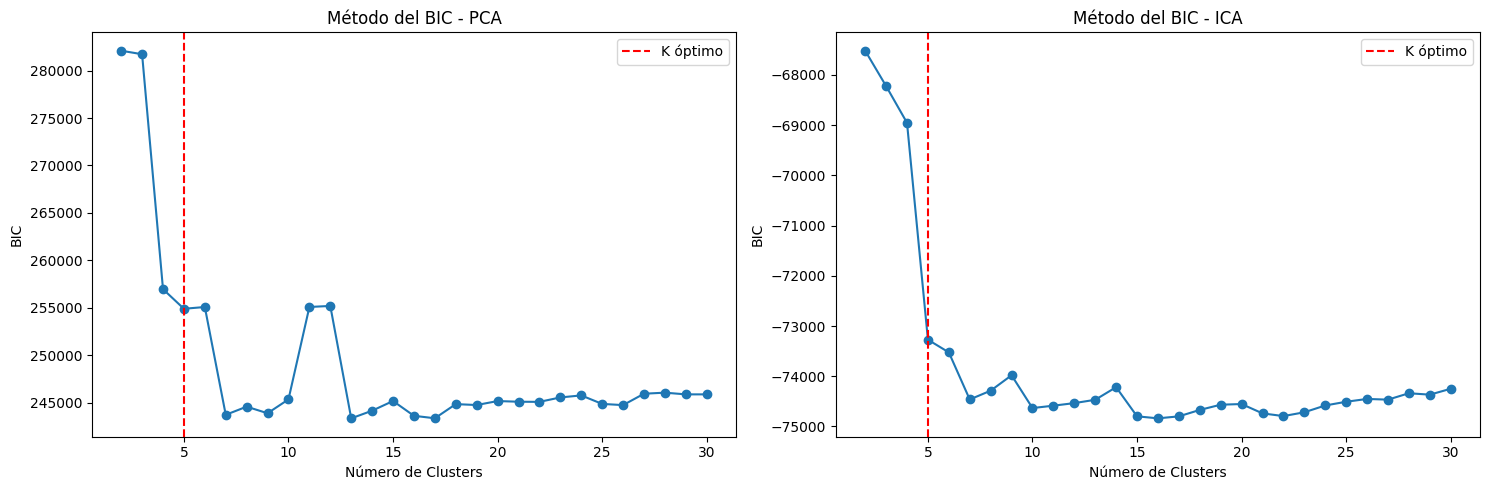

In [23]:
from sklearn.mixture import GaussianMixture

# Clustering con Gaussian Mixture
clustering_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

# Número de gráficos a mostrar
num_plots = len(clustering_data)

# Configuración del diseño de los subgráficos
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

# Número óptimo de clusters para PCA
k_optimal_gm_pca = 5

# Número óptimo de clusters para ICA
k_optimal_gm_ica = 5

for i, (name, data) in enumerate(clustering_data.items()):
    ax = axes[i] if num_plots > 1 else axes  # Acceder al subgráfico correspondiente

    # Determinar el número óptimo de clusters utilizando el método del codo
    bic = []
    num_clusters_range = range(2, 31)  # Rango de valores para el número de clusters

    for k in num_clusters_range:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data['data'])
        bic.append(gmm.bic(data['data']))

    # Graficar la curva del criterio de información de Bayes (BIC)
    ax.plot(num_clusters_range, bic, marker='o')
    ax.axvline(x=k_optimal_gm_pca if name == 'PCA' else k_optimal_gm_ica, color='red', linestyle='--', label='K óptimo')
    ax.set_xlabel('Número de Clusters')
    ax.set_ylabel('BIC')
    ax.set_title(f'Método del BIC - {name}')
    ax.legend()

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



<ipython-input-24-970947c4e93a>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis', num_clusters)


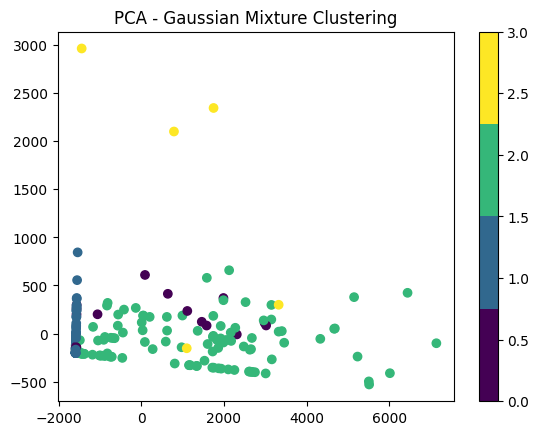

<ipython-input-24-970947c4e93a>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis', num_clusters)


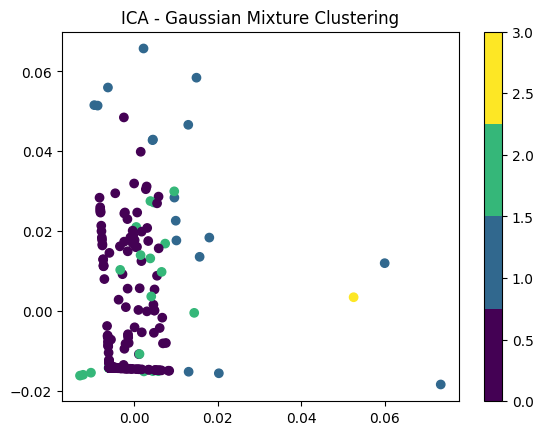

In [24]:
# Clustering con Gaussian Mixture
clustering_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

for name, data in clustering_data.items():
    num_clusters = 4
    
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm.fit(data['data'])
    labels = gmm.predict(data['data'])
    
    cm = plt.cm.get_cmap('viridis', num_clusters)
    plt.scatter(data['data'][1:200, 0], data['data'][1:200, 1], c=labels[1:200], cmap=cm)
    plt.colorbar()
    plt.title(f'{name} - Gaussian Mixture Clustering')
    plt.show()

### Agglomerative Clustering

Este metodo tarda muchisimo más en calcular que los anteriores, por lo que es un factor a tener en cuenta si el dataset es muy grande

<ipython-input-25-4eb3b9f21f49>:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='ward')


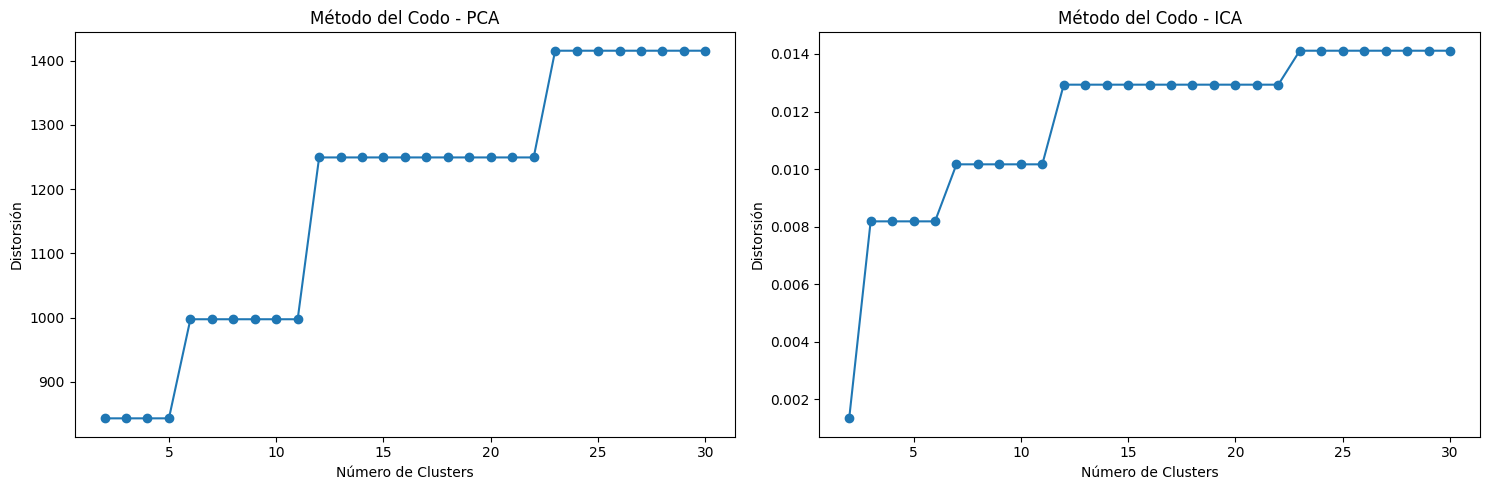

In [25]:
# Clustering con Agglomerative Clustering
clustering_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

# Número de gráficos a mostrar
num_plots = len(clustering_data)

# Configuración del diseño de los subgráficos
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

for i, (name, data) in enumerate(clustering_data.items()):
    ax = axes[i] if num_plots > 1 else axes  # Acceder al subgráfico correspondiente

    # Determinar el número óptimo de clusters utilizando el método del codo
    distortions = []
    num_clusters_range = range(2, 31)  # Rango de valores para el número de clusters

    for k in num_clusters_range:
        # Calcula las distancias entre los puntos
        distances = cdist(data['data'], data['data'], 'euclidean')
        # Realiza el clustering aglomerativo
        linkage_matrix = linkage(distances, method='ward')
        # Asigna los puntos a los clusters
        labels = fcluster(linkage_matrix, k, criterion='maxclust')
        # Calcula la distancia de los puntos a los centroides más cercanos
        min_distances = cdist(data['data'], data['data'][labels == labels[0]], 'euclidean').min(axis=1)
        distortions.append(min_distances.mean())

    # Graficar la curva de distorsión
    ax.plot(num_clusters_range, distortions, marker='o')
    ax.set_xlabel('Número de Clusters')
    ax.set_ylabel('Distorsión')
    ax.set_title(f'Método del Codo - {name}')

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


<ipython-input-28-a919e3a554d3>:27: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='ward')


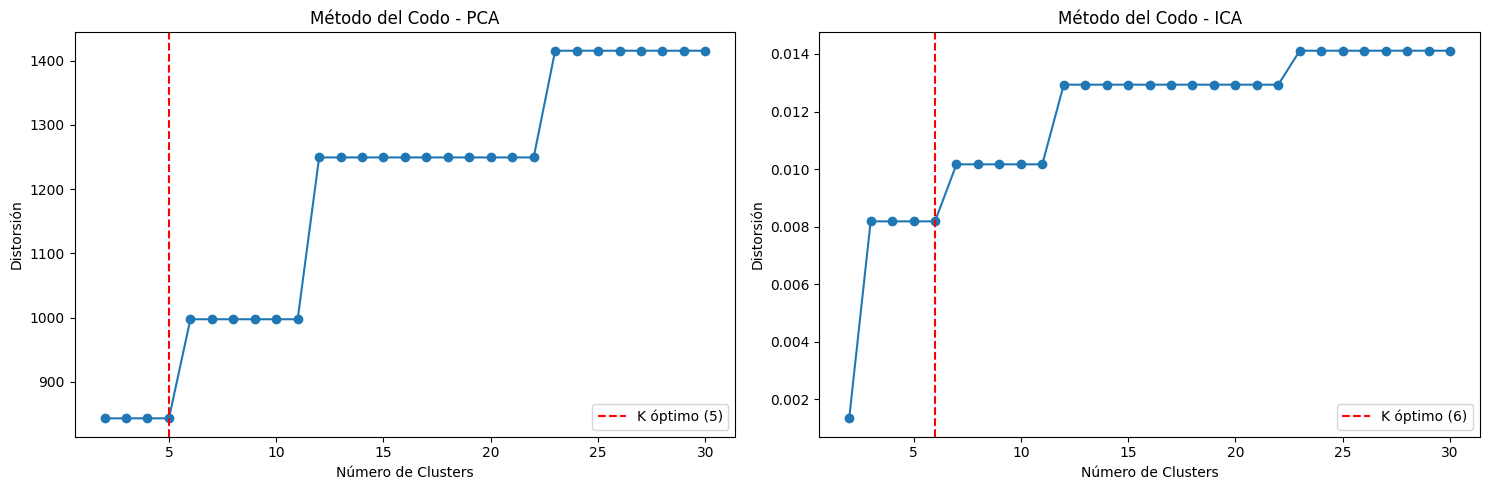

In [28]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist

# Clustering con Agglomerative Clustering
clustering_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

# Número de gráficos a mostrar
num_plots = len(clustering_data)

# Configuración del diseño de los subgráficos
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

# Valores óptimos de k
k_optimal = {'PCA': 5, 'ICA': 6}

for i, (name, data) in enumerate(clustering_data.items()):
    ax = axes[i] if num_plots > 1 else axes  # Acceder al subgráfico correspondiente

    # Determinar el número óptimo de clusters utilizando el método del codo
    distortions = []
    num_clusters_range = range(2, 31)  # Rango de valores para el número de clusters

    for k in num_clusters_range:
        # Calcula las distancias entre los puntos
        distances = cdist(data['data'], data['data'], 'euclidean')
        # Realiza el clustering aglomerativo
        linkage_matrix = linkage(distances, method='ward')
        # Asigna los puntos a los clusters
        labels = fcluster(linkage_matrix, k, criterion='maxclust')
        # Calcula la distancia de los puntos a los centroides más cercanos
        min_distances = cdist(data['data'], data['data'][labels == labels[0]], 'euclidean').min(axis=1)
        distortions.append(min_distances.mean())

    # Graficar la curva de distorsión
    ax.plot(num_clusters_range, distortions, marker='o')
    ax.axvline(x=k_optimal[name], color='red', linestyle='--', label=f'K óptimo ({k_optimal[name]})')
    ax.set_xlabel('Número de Clusters')
    ax.set_ylabel('Distorsión')
    ax.set_title(f'Método del Codo - {name}')
    ax.legend()

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


<ipython-input-29-f345879e3345>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis', num_clusters)


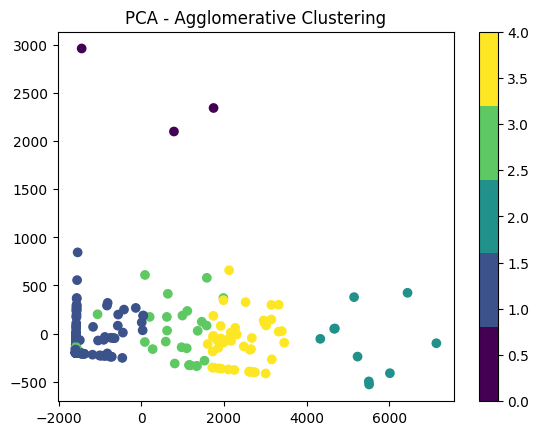

<ipython-input-29-f345879e3345>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis', num_clusters)


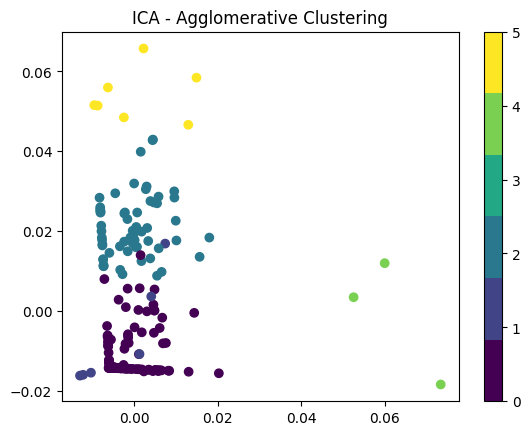

In [29]:
from sklearn.cluster import AgglomerativeClustering

clustering_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}
k_optimal = {'PCA': 5, 'ICA': 6}

for name, data in clustering_data.items():
    num_clusters = k_optimal[name]
    
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    labels = agglomerative.fit_predict(data['data'])
    
    cm = plt.cm.get_cmap('viridis', num_clusters)
    plt.scatter(data['data'][1:200, 0], data['data'][1:200, 1], c=labels[1:200], cmap=cm)
    plt.colorbar()
    plt.title(f'{name} - Agglomerative Clustering')
    plt.show()


## COMPARACION

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-ca4241f4e5a8>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis', num_clusters)
<ipython-input-30-ca4241f4e5a8>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis', num_clusters)
<ipython-input-30-ca4241f4e5a8>:44: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distan

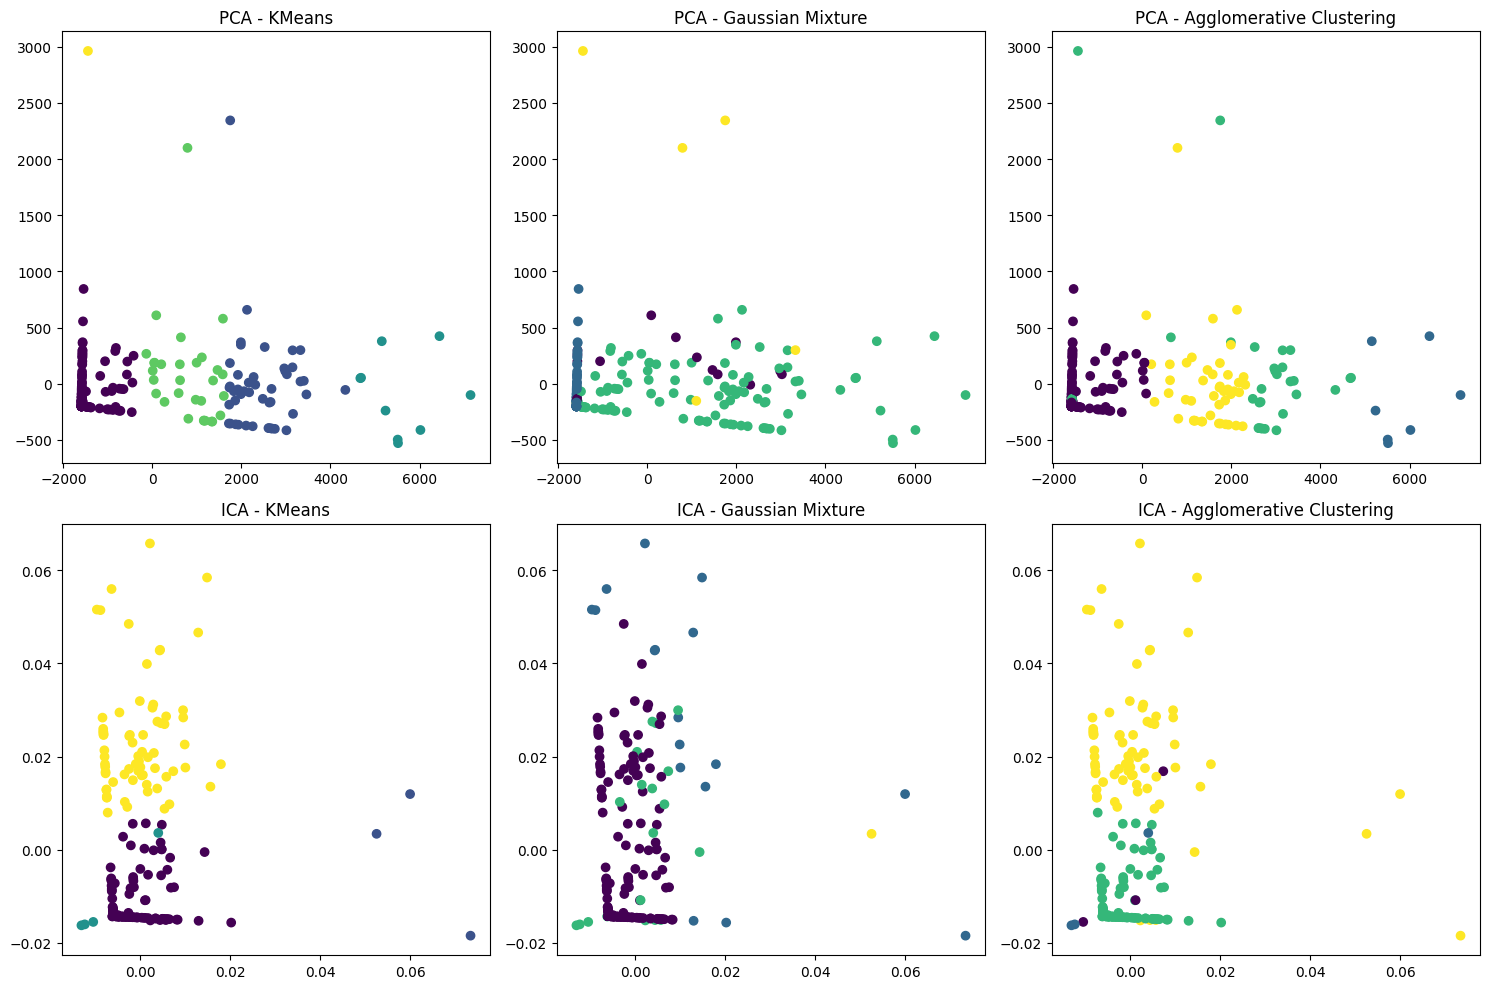

In [30]:
# Clustering con KMeans
kmeans_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

# Clustering con Gaussian Mixture
gmm_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

# Clustering con Agglomerative Clustering
agglomerative_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

# Número de gráficos a mostrar
num_plots = len(kmeans_data)

# Configuración del diseño de los subgráficos
fig, axes = plt.subplots(num_plots, 3, figsize=(15, num_plots * 5))

for i, (name, kmeans_data) in enumerate(kmeans_data.items()):
    ax = axes[i, 0]
    
    # KMeans
    num_clusters = 5
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(kmeans_data['data'])
    
    cm = plt.cm.get_cmap('viridis', num_clusters)
    ax.scatter(kmeans_data['data'][1:200, 0], kmeans_data['data'][1:200, 1], c=labels[1:200], cmap=cm)
    ax.set_title(f'{name} - KMeans')
    
    ax = axes[i, 1]
    
    # Gaussian Mixture
    num_clusters = 4
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    labels = gmm.fit_predict(gmm_data[name]['data'])
    
    cm = plt.cm.get_cmap('viridis', num_clusters)
    ax.scatter(gmm_data[name]['data'][1:200, 0], gmm_data[name]['data'][1:200, 1], c=labels[1:200], cmap=cm)
    ax.set_title(f'{name} - Gaussian Mixture')
    
    ax = axes[i, 2]
    
    # Agglomerative Clustering
    num_clusters = 4
    distances = cdist(agglomerative_data[name]['data'], agglomerative_data[name]['data'], 'euclidean')
    linkage_matrix = linkage(distances, method='ward')
    labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    
    cm = plt.cm.get_cmap('viridis', num_clusters)
    ax.scatter(agglomerative_data[name]['data'][1:200, 0], agglomerative_data[name]['data'][1:200, 1], c=labels[1:200], cmap=cm)
    ax.set_title(f'{name} - Agglomerative Clustering')

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Para la comparativa voy a usar los métodos de comparación de clustering, como Silhouette Score, Calinski-Harabasz Score y Davies-Bouldin Score asi como el método Rand Score.  Silhouette Score, Calinski-Harabasz Score y Davies-Bouldin Score evalúan la calidad interna de un único agrupamiento en términos de cohesión, separación y similitud entre los clusters y el Rand Score se utiliza para comparar dos agrupamientos diferentes y medir su similitud global.

In [31]:

# Crear listas para almacenar los resultados
dataset_names = []
algorithm_names = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

# Calcular las métricas y almacenar los resultados en las listas
for data_name, data in clustering_data.items():
    X = data['data']
    
    # K-means
    kmeans = KMeans(n_clusters=3)  # Reemplaza el valor de n_clusters según tus necesidades
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_silhouette_score = metrics.silhouette_score(X, kmeans_labels)
    kmeans_calinski_score = metrics.calinski_harabasz_score(X, kmeans_labels)
    kmeans_davies_bouldin_score = metrics.davies_bouldin_score(X, kmeans_labels)
    
    dataset_names.append(data_name)
    algorithm_names.append('K-means')
    silhouette_scores.append(round(kmeans_silhouette_score, 5))
    calinski_scores.append(round(kmeans_calinski_score, 2))
    davies_bouldin_scores.append(round(kmeans_davies_bouldin_score, 5))
    
    # Gaussian Mixture
    gmm = GaussianMixture(n_components=3)  # Reemplaza el valor de n_components según tus necesidades
    gmm_labels = gmm.fit_predict(X)
    gmm_silhouette_score = metrics.silhouette_score(X, gmm_labels)
    gmm_calinski_score = metrics.calinski_harabasz_score(X, gmm_labels)
    gmm_davies_bouldin_score = metrics.davies_bouldin_score(X, gmm_labels)
    
    dataset_names.append(data_name)
    algorithm_names.append('Gaussian Mixture')
    silhouette_scores.append(round(gmm_silhouette_score, 5))
    calinski_scores.append(round(gmm_calinski_score, 2))
    davies_bouldin_scores.append(round(gmm_davies_bouldin_score, 5))
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=3)  # Reemplaza el valor de n_clusters según tus necesidades
    agglomerative_labels = agglomerative.fit_predict(X)
    agglomerative_silhouette_score = metrics.silhouette_score(X, agglomerative_labels)
    agglomerative_calinski_score = metrics.calinski_harabasz_score(X, agglomerative_labels)
    agglomerative_davies_bouldin_score = metrics.davies_bouldin_score(X, agglomerative_labels)
    
    dataset_names.append(data_name)
    algorithm_names.append('Agglomerative Clustering')
    silhouette_scores.append(round(agglomerative_silhouette_score, 5))
    calinski_scores.append(round(agglomerative_calinski_score, 2))
    davies_bouldin_scores.append(round(agglomerative_davies_bouldin_score, 5))

# Crear el dataframe de resultados
results_df = pd.DataFrame({
    'Transformation': dataset_names,
    'Algorithm': algorithm_names,
    'Silhouette Score': silhouette_scores,
    'Calinski-Harabasz Score': calinski_scores,
    'Davies-Bouldin Score': davies_bouldin_scores
})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
results_df

,Transformation,Algorithm,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,PCA,K-means,0.66350,4315.30,0.61104
1,PCA,Gaussian Mixture,0.29385,827.17,2.44095
2,PCA,Agglomerative Clustering,0.63565,3528.83,0.59327
3,ICA,K-means,0.58488,1632.20,0.61749
4,ICA,Gaussian Mixture,0.59782,502.29,1.40920
5,ICA,Agglomerative Clustering,0.58720,1564.47,0.68975


- Silhouette Score: Esta métrica determina la cohesión y separación de los clústeres. Un valor de Silhouette Score cercano a 1 indica que los puntos están bien agrupados y separados, mientras que un valor cercano a -1 indica un grupo deficiente. El límite de decisión entre dos conglomerados se indica con un valor relativamente cercano a 0. Una mejor agrupación generalmente se indica con una puntuación más alta.

- Calinski-Harabasz Score: Esta métrica se basa en la correlación entre la dispersión de grupos y la dispersión de grupos. Una mejor separación y cohesión entre los clústeres se indica mediante un valor de Calinski-Harabasz Score más alto. Esta métrica favorece las agrupaciones que son pequeñas y claramente separadas entre sí.

- Davies-Bouldin Score: Esta métrica mide qué tan similares son los clústeres entre sí. Una mejor separación y cohesión entre los clústeres se indica mediante un valor más bajo de Davies-Bouldin Score. Un valor cercano a 0 indica clústeres distintos y bien definidos, mientras que un valor alto denota clústeres superpuestos o pobremente definidos.

In [32]:
clustering_data = {'PCA': {'data': transformacion_pca}, 'ICA': {'data': transformacion_ica}}

for name, data in clustering_data.items():
    if name == 'PCA':
        num_clusters = 5
    else:
        num_clusters = 4
    
    # K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data['data'])
    labels_kmeans = kmeans.labels_
    rand_score_kmeans = adjusted_rand_score(targets, labels_kmeans)
    
    # Gaussian Mixture
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm.fit(data['data'])
    labels_gmm = gmm.predict(data['data'])
    rand_score_gmm = adjusted_rand_score(targets, labels_gmm)
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    labels_agglo = agglomerative.fit_predict(data['data'])
    rand_score_agglo = adjusted_rand_score(targets, labels_agglo)
    
    print(name, '- KMeans: Rand Score =', rand_score_kmeans)
    print(name, '- Gaussian Mixture: Rand Score =', rand_score_gmm)
    print(name, '- Agglomerative Clustering: Rand Score =', rand_score_agglo)
    print('-' * 50)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PCA - KMeans: Rand Score = 0.10713551094855744
PCA - Gaussian Mixture: Rand Score = 0.023347466095455408
PCA - Agglomerative Clustering: Rand Score = 0.11667274656681849
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ICA - KMeans: Rand Score = 0.11202585158242331
ICA - Gaussian Mixture: Rand Score = 0.14653679302281078
ICA - Agglomerative Clustering: Rand Score = 0.1252678643628004
--------------------------------------------------


El Rand Score compara dos grupos para determinar qué tan similares son en lugar de evaluar la calidad interna de los grupos directamente. El Rand Score asigna una puntuación entre 0 y 1, donde una puntuación de 1 indica una coincidencia perfecta entre los grupos y una puntuación cercana a 0 indica falta de similitud.